In [25]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [42]:
F = len("Mateusz")
L = len("Pilecki")
N = (L+F)*100

model = CmdStanModel(stan_file='code_1.stan')
data = {"N": N}
result = model.sample(data=data, chains=4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)




chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:01 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:01 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:02 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:02 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                      
chain 2 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [43]:
result.draws_pd()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1391],y[1392],y[1393],y[1394],y[1395],y[1396],y[1397],y[1398],y[1399],y[1400]
0,0.0,0.0,0.01,-0.510956,2.061060,0.877298,-0.947117,0.783978,-0.567791,0.195646,...,0.147083,0.510606,-1.282120,-1.565740,0.173691,-2.305320,0.306098,-1.146700,-0.324693,-0.722974
1,0.0,0.0,0.01,0.283516,-0.759345,-1.094260,1.096010,-0.350253,-0.351499,-1.447040,...,1.269120,0.379618,-0.895535,-0.034686,0.973779,1.194310,-0.385072,-0.157364,-2.068000,0.961413
2,0.0,0.0,0.01,-0.260272,0.469718,0.158553,-1.480290,-0.656943,-0.352142,0.337556,...,-0.800271,-0.529354,0.734241,0.465217,0.130652,1.350960,0.091741,1.340660,0.334153,1.147700
3,0.0,0.0,0.01,0.293631,1.060660,-0.040363,10.170100,0.207458,0.220748,0.558865,...,1.129360,0.364908,-0.738455,1.257460,0.015740,0.271402,0.588330,-1.163670,0.350176,0.175027
4,0.0,0.0,0.01,-0.551155,-0.623598,-0.746541,1.949980,-0.519028,0.374629,-0.516053,...,0.415746,-0.440744,-1.735730,1.251700,1.652170,-0.642886,-1.573780,-1.436550,-1.403550,-0.225269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.01,0.215925,-1.276610,0.548382,1.273690,-0.704330,-1.548270,-0.729568,...,0.060468,-0.043353,0.714954,1.001200,-0.248833,-2.040150,-1.324370,0.418394,0.839613,0.597620
3996,0.0,0.0,0.01,0.759857,-0.865806,-0.519773,-1.175220,0.242610,-0.636493,-0.128896,...,0.909932,1.314490,0.362064,0.694717,0.569336,-0.216074,0.502794,-1.477530,-0.332037,1.815980
3997,0.0,0.0,0.01,-0.393829,0.636175,0.567426,-0.569421,0.368060,0.738486,-0.569622,...,1.105250,-1.028310,0.822643,-0.175530,1.473400,1.273350,-0.596646,1.280870,0.393797,-1.879770
3998,0.0,0.0,0.01,-1.150470,0.137431,0.223060,0.107146,-0.378503,1.913010,-0.237792,...,1.055390,0.639187,1.577630,-2.672020,-0.633762,0.057002,0.663382,-1.419380,-0.124226,-0.728046


In [44]:
y = result.stan_variable("y")[0]
print(y.shape)

(1400,)


In [45]:
model = CmdStanModel(stan_file='code_2.stan')
data = {"N": N}
result_2 = model.sample(data=data, chains=4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 1 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:02 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:03 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:04 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:05 Iteration: 500 / 1000 [ 50%]  (Sampling)



chain 1 |███▋      | 00:06 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:06 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |████▌     | 00:07 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:08 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:08 Sampling completed                      
chain 2 |██████████| 00:08 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [46]:
result_2.draws_pd()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1391],y[1392],y[1393],y[1394],y[1395],y[1396],y[1397],y[1398],y[1399],y[1400]
0,0.0,0.0,0.905483,-0.040144,1.054680,-1.067270,0.831394,0.777766,-0.332503,-0.907576,...,3.40812,-2.167830,0.354321,-3.565490,4.233610,-1.069650,-0.541064,0.030799,-3.560030,-2.380900
1,0.0,0.0,0.963959,-0.694622,0.298087,-0.410499,0.036311,0.417089,-0.560693,-1.124070,...,-4.81662,-2.266920,6.628100,2.395840,-3.134860,-0.302915,0.375382,1.042940,2.529190,3.608280
2,0.0,0.0,0.511867,2.445020,-0.319066,1.817790,-0.712066,-1.782800,-0.116748,-0.335304,...,2.19425,0.158824,0.837511,6.600490,1.248410,-2.418890,-3.037130,-1.583830,-0.384144,0.521296
3,0.0,0.0,-0.488185,-2.264880,0.033747,-1.246170,1.772180,0.480458,1.023190,0.472668,...,1.06329,-0.948162,-1.961000,3.967040,0.312602,-4.223700,-0.909572,-5.626400,3.648460,2.259270
4,0.0,0.0,0.444245,0.158667,-0.733741,-1.376320,-0.258770,1.161440,0.197630,1.461110,...,-1.63154,0.003681,0.002447,-0.704450,-0.690389,-0.825875,-1.113820,-0.840833,-0.737726,-2.430470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.376858,2.786730,0.496468,0.710907,-0.820195,0.508022,0.017238,1.088190,...,-3.04977,0.011605,1.240160,3.573920,1.894420,0.959898,0.725287,-1.096500,0.902844,-0.829512
3996,0.0,0.0,-0.312647,0.074544,-0.058888,0.524613,1.461440,-0.345220,-0.345401,-2.447890,...,1.24597,2.662890,0.475627,-1.235780,1.620890,0.356386,-0.188809,-1.063260,-1.062150,3.347630
3997,0.0,0.0,0.089941,0.694093,-3.075470,0.175454,-1.733830,-0.378390,0.119410,-0.634175,...,-1.10709,-5.068980,-2.109620,2.477730,1.909300,1.299740,3.825000,-2.171370,-2.292360,4.530020
3998,0.0,0.0,0.007715,-0.693950,0.701009,1.798880,-0.540817,0.317686,-1.406430,-0.283505,...,-1.97728,1.375490,3.710770,-0.970286,-2.407640,4.026950,2.769960,-1.847460,0.825577,0.447918


In [70]:
X = result_2.stan_variable("X")[0][:, 0:1]
X.shape

(1400, 1)

In [48]:
Y_2 = result_2.stan_variable("y")[0]

(4000, 1400, 3)


In [31]:
model = CmdStanModel(stan_file='code_3.stan')
data = {"N": N, "y":y}
result = model.sample(data=data, chains=4)


#Convertion to arviz InferenceData
arviz_result_3 = az.from_cmdstanpy(
    posterior=result
)

arviz_result_3

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed             


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [32]:
model = CmdStanModel(stan_file='code_4.stan')
data = {"N": N, "y":y}
result = model.sample(data=data, chains=4)

#Convertion to arviz InferenceData
arviz_result_4 = az.from_cmdstanpy(
    posterior=result
)

arviz_result_4

INFO:cmdstanpy:compiling stan file E:\uczelnia\ISZ\semestr1\data_analytics\lab7_model_comparison\code_4.stan to exe file E:\uczelnia\ISZ\semestr1\data_analytics\lab7_model_comparison\code_4.exe
INFO:cmdstanpy:compiled model executable: E:\uczelnia\ISZ\semestr1\data_analytics\lab7_model_comparison\code_4.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [38]:
compare_dict = {"model_3": arviz_result_3, "model_4": arviz_result_4}
az_compare = az.compare(compare_dict)
az_compare

c:\Users\PC\Anaconda3\envs\ABD\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_4,0,-2205.578029,4.517316,0.000000,1.0,44.825201,0.000000,False,log
model_3,1,-2959.415138,38.412376,753.837109,0.0,165.916735,134.183527,True,log


<AxesSubplot:xlabel='Log'>

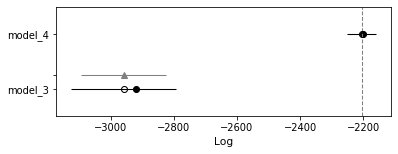

In [39]:
az.plot_compare(az_compare)

In [40]:
compare_dict = {"model_3": arviz_result_3, "model_4": arviz_result_4}
az_compare = az.compare(compare_dict, ic="waic")
az_compare

c:\Users\PC\Anaconda3\envs\ABD\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_4,0,-2205.571581,4.510869,0.000000,1.000000e+00,44.823649,0.000000,False,log
model_3,1,-2958.243424,37.240662,752.671843,1.998401e-15,165.445391,133.701409,True,log


<AxesSubplot:xlabel='Log'>

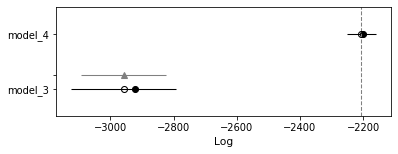

In [41]:
az.plot_compare(az_compare)

In [71]:
model_5 = CmdStanModel(stan_file='code_5.stan')
data_5_1 = {"N": N, "y":Y_2, "X": X, "K": 1}
result_5_1 = model_5.sample(data=data_5_1, chains=4)

#Convertion to arviz InferenceData
arviz_result_5_1 = az.from_cmdstanpy(
    posterior=result_5_1
)

arviz_result_5_1

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |██████████| 00:06 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [73]:
X = result_2.stan_variable("X")[0][:, 0:2]
X.shape

data_5_2 = {"N": N, "y":Y_2, "X": X, "K": 2}
result_5_2 = model_5.sample(data=data_5_2, chains=4)

#Convertion to arviz InferenceData
arviz_result_5_2 = az.from_cmdstanpy(
    posterior=result_5_2
)

arviz_result_5_2

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |██████████| 00:06 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [74]:
X = result_2.stan_variable("X")[0][:, 0:3]
X.shape
data_5_3 = {"N": N, "y":Y_2, "X": X, "K": 3}
result_5_3 = model_5.sample(data=data_5_3, chains=4)

#Convertion to arviz InferenceData
arviz_result_5_3 = az.from_cmdstanpy(
    posterior=result_5_3
)

arviz_result_5_3

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling complete


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [75]:
compare_dict = {"model_5_K_1": arviz_result_5_1, "model_5_K_2": arviz_result_5_2, "model_5_K_3": arviz_result_5_3}
az_compare = az.compare(compare_dict, ic="waic")
az_compare

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_5_K_3,0,-1903.142866,4.020942,0.000000,9.752165e-01,26.715210,0.000000,False,log
model_5_K_2,1,-2088.940622,2.994394,185.797757,2.478351e-02,26.722064,18.581717,False,log
model_5_K_1,2,-2554.353576,1.923246,651.210710,6.894485e-13,26.209044,30.037727,False,log


<AxesSubplot:xlabel='Log'>

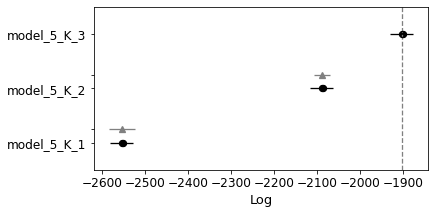

In [76]:
az.plot_compare(az_compare)

In [77]:
compare_dict = {"model_5_K_1": arviz_result_5_1, "model_5_K_2": arviz_result_5_2, "model_5_K_3": arviz_result_5_3}
az_compare = az.compare(compare_dict)
az_compare

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_5_K_3,0,-1903.142715,4.020792,0.000000,9.752172e-01,26.715198,0.000000,False,log
model_5_K_2,1,-2088.940579,2.994350,185.797863,2.478284e-02,26.722045,18.581708,False,log
model_5_K_1,2,-2554.353746,1.923416,651.211030,3.560485e-12,26.209063,30.037730,False,log


<AxesSubplot:xlabel='Log'>

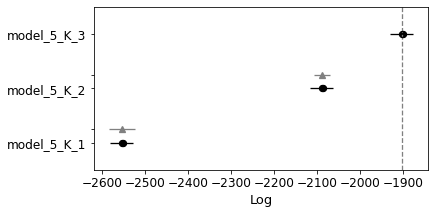

In [78]:
az.plot_compare(az_compare)